# **<center>STOCK PRICE PREDICTION - BYD</center>**
**Discussed Algorithms:**
  1. Support Vector Regressor
  2. KNN Regressor
  3. GRU (Gated Recurrent Unit)
  4. LSTM (Long Short-Term Memory)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

**Data Ingestion**

In [2]:
df = yf.download("002594.SZ", start="2020-01-01", end="2025-04-01")
df = df.round(2)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


**Top 5 rows of dataframe**

In [3]:
# 检查原始列名
print("原始列索引：", df.columns)

# 手动设置正确的列名
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# 删除列名的名称（即 'Ticker'）
df.columns.name = None

# 打印结果
print(df.head())

原始列索引： MultiIndex([( 'Close', '002594.SZ'),
            (  'High', '002594.SZ'),
            (   'Low', '002594.SZ'),
            (  'Open', '002594.SZ'),
            ('Volume', '002594.SZ')],
           names=['Price', 'Ticker'])
            Close   High    Low   Open    Volume
Date                                            
2020-01-02  47.30  47.60  46.66  46.83  15934570
2020-01-03  47.18  48.11  46.82  47.33  12993607
2020-01-06  47.41  48.31  46.34  46.54  16987138
2020-01-07  47.19  47.63  46.91  47.44   9340058
2020-01-08  46.43  47.48  46.30  46.70  11097445


In [4]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,47.30,47.60,46.66,46.83,15934570
2020-01-03,47.18,48.11,46.82,47.33,12993607
2020-01-06,47.41,48.31,46.34,46.54,16987138
2020-01-07,47.19,47.63,46.91,47.44,9340058
2020-01-08,46.43,47.48,46.30,46.70,11097445


**Bottom 5 rows of dataframe**

In [5]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-03-25,369.59,379.60,368.98,377.98,12308536
2025-03-26,376.01,379.00,368.00,369.59,12020484
2025-03-27,386.50,391.28,376.09,376.10,14439437
2025-03-28,382.50,390.80,381.50,386.50,11493982
2025-03-31,374.90,383.28,374.00,380.00,11578391


**Shape of the dataframe**

In [6]:
df.shape

(1269, 5)

**List of columns in the dataframe**

In [7]:
df.columns # 删除第一级索引（即 'Ticker' 这一行）

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

**Checking duplicate**

In [8]:
df.duplicated().sum()

0

**Checking Null**

In [9]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

**Basic information about  the dataframe**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1269 entries, 2020-01-02 to 2025-03-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1269 non-null   float64
 1   High    1269 non-null   float64
 2   Low     1269 non-null   float64
 3   Open    1269 non-null   float64
 4   Volume  1269 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.5 KB


**Basic statistics of the dataframe**

In [11]:
df.describe()

,Close,High,Low,Open,Volume
count,1269.000000,1269.000000,1269.000000,1269.000000,1.269000e+03
mean,221.768865,225.539504,217.778455,221.578897,2.044261e+07
std,77.264121,78.361324,76.170281,77.366183,1.333695e+07
min,46.080000,46.800000,45.770000,46.540000,4.138033e+06
25%,185.570000,188.580000,181.080000,185.170000,1.046494e+07
50%,241.450000,245.570000,237.710000,241.940000,1.602755e+07
75%,266.050000,270.470000,262.810000,267.120000,2.634533e+07
max,399.990000,403.400000,395.990000,400.000000,8.076668e+07


**Checking unique and making Date as index to perform our analysis**

In [12]:
df.nunique()
df['Date'] = df.index

In [13]:
df

,Close,High,Low,Open,Volume,Date
Date,,,,,,
2020-01-02,47.30,47.60,46.66,46.83,15934570,2020-01-02
2020-01-03,47.18,48.11,46.82,47.33,12993607,2020-01-03
2020-01-06,47.41,48.31,46.34,46.54,16987138,2020-01-06
2020-01-07,47.19,47.63,46.91,47.44,9340058,2020-01-07
2020-01-08,46.43,47.48,46.30,46.70,11097445,2020-01-08
...,...,...,...,...,...,...
2025-03-25,369.59,379.60,368.98,377.98,12308536,2025-03-25
2025-03-26,376.01,379.00,368.00,369.59,12020484,2025-03-26
2025-03-27,386.50,391.28,376.09,376.10,14439437,2025-03-27


**Cheking range of date**

In [14]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2020-01-02 00:00:00
Ending date:  2025-03-31 00:00:00
Duration:  1915 days 00:00:00


**Creating monthvise data**

In [15]:
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')

In [16]:
monthvise

,Open,Close
Date,,
April,179.089400,179.486200
May,193.137789,194.091474
January,210.555586,210.688378
March,212.578120,212.370376
February,221.690000,222.136442
September,222.325980,222.235294
June,222.010990,223.513762
July,229.506727,229.656818
August,235.202252,234.873874


**Potting monthvise data**

Text(0.5, 1.0, 'Monthwise comparision between Stock open and close price-BYD')

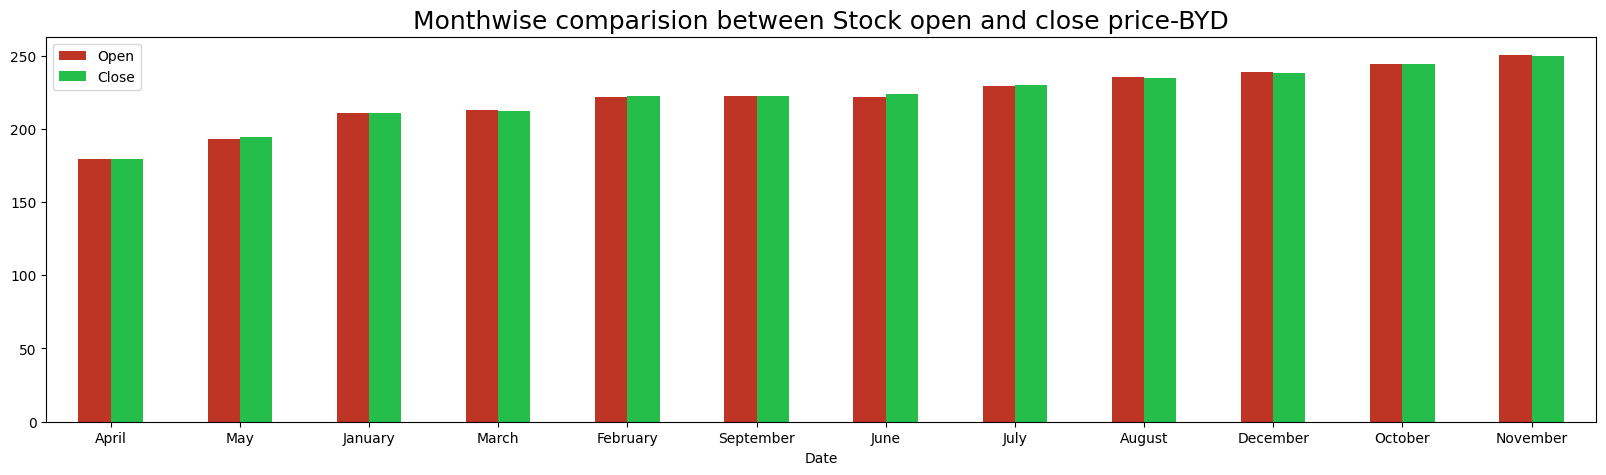

In [17]:
monthvise.plot.bar(rot=0, color={"Open": "#BE3525", "Close":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise comparision between Stock open and close price-BYD", fontsize = 18)

In [18]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

**Minimum low price in each month**

In [19]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April         53.18
August        76.75
December     159.99
February      52.88
January       45.77
July          69.75
June          56.41
March         46.54
May           54.32
November     156.77
October      117.14
September     83.39
Name: Low, dtype: float64

**Maximum low price in each month**

In [20]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()

Date
April        249.82
August       318.51
December     298.01
February     373.48
January      283.00
July         332.33
June         342.49
March        395.99
May          288.58
November     309.76
October      312.52
September    290.00
Name: Low, dtype: float64

**Minimum high price in each month**

In [21]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April         54.80
August        78.62
December     166.43
February      53.50
January       46.80
July          73.27
June          58.62
March         48.98
May           55.53
November     165.79
October      123.96
September     86.97
Name: High, dtype: float64

**Maximum high price in each month**

In [22]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        258.64
August       329.34
December     308.79
February     388.66
January      287.43
July         346.04
June         352.84
March        403.40
May          295.91
November     324.43
October      338.04
September    308.08
Name: High, dtype: float64

In [23]:
monthvise['monthvise_high']= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise['monthvise_low']= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Text(0.5, 1.0, 'Monthwise High and Low stock price-BYD')

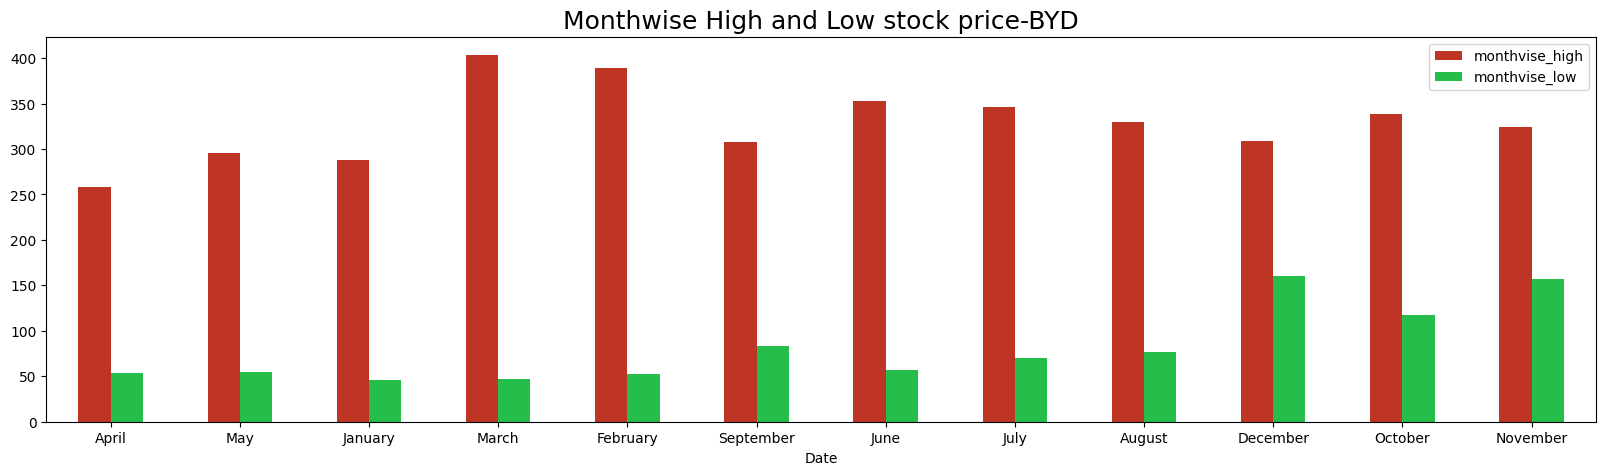

In [24]:
monthvise[['monthvise_high', 'monthvise_low']].plot.bar(rot=0, color={"monthvise_high": "#BE3525", "monthvise_low":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise High and Low stock price-BYD", fontsize = 18)

Text(0.5, 1.0, 'Stock analysis chart-BYD')

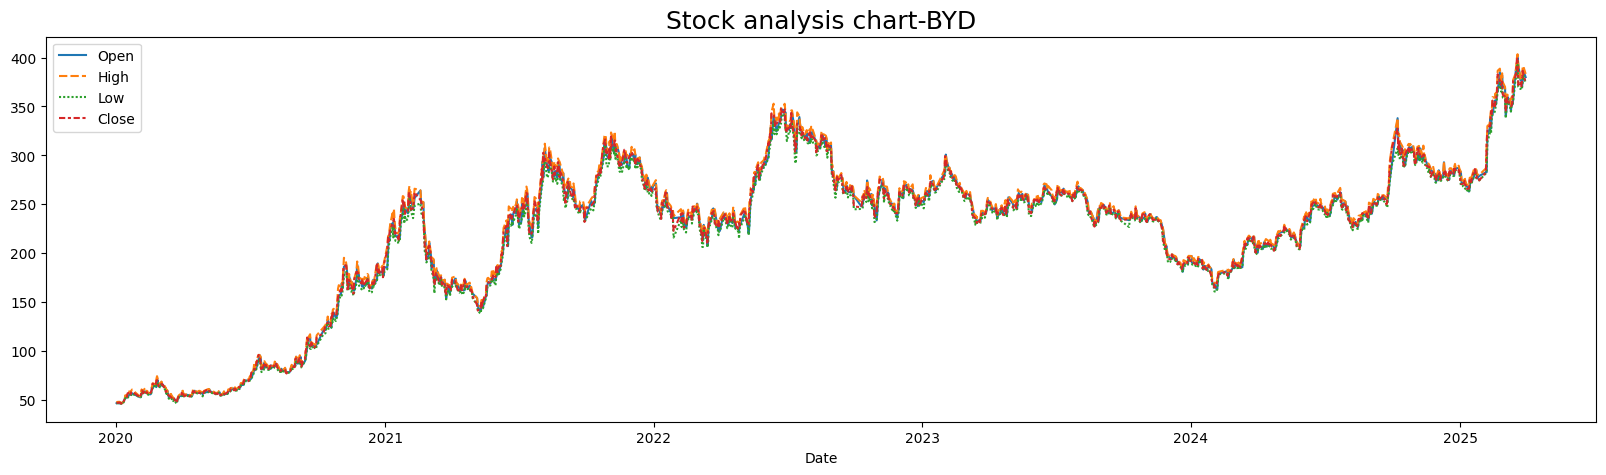

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[['Open','High','Low','Close']])
plt.title("Stock analysis chart-BYD",fontsize=18)

In [26]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1269, 2)


Text(0.5, 1.0, 'Stock close price chart of BYD')

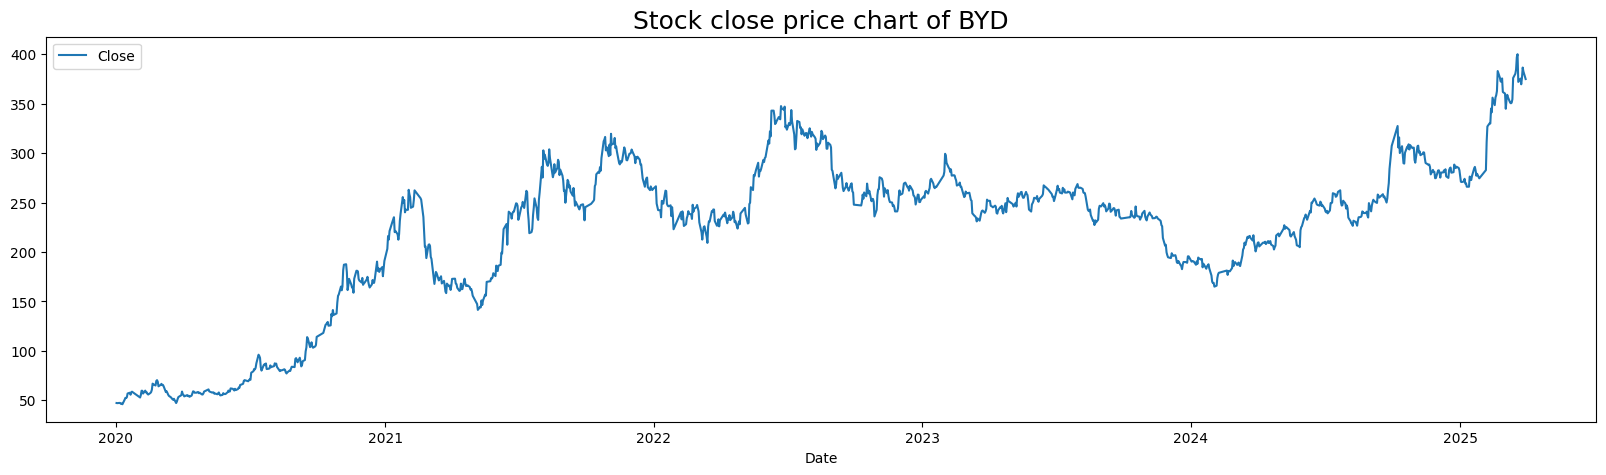

In [27]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart of BYD",fontsize=18)

## **Model Creation**

#### **Indicators of close price**

Basic Statistics of Close Price:
                    Close Price
Statistic                      
Mean                 221.768865
Standard Deviation    77.264121
Minimum               46.080000
Maximum              399.990000
Count               1269.000000


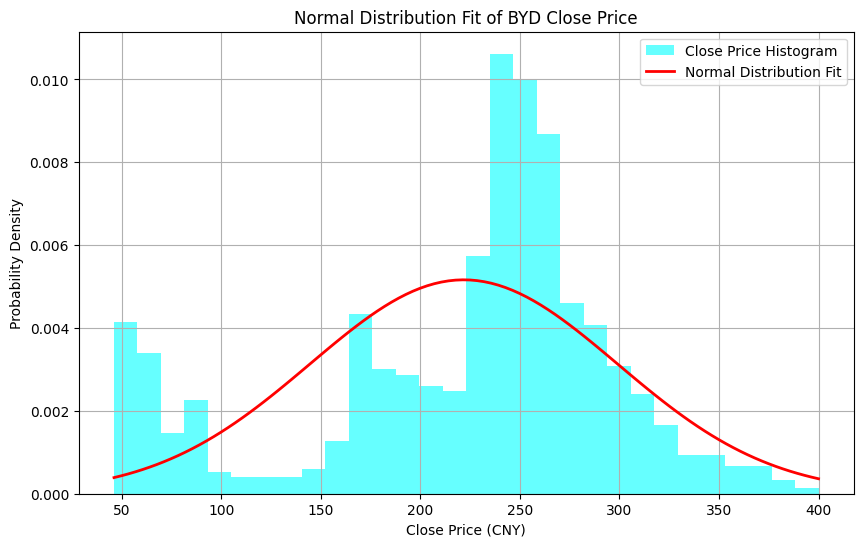

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

close_prices = df['Close']

stats = {
    'Statistic': ['Mean', 'Standard Deviation', 'Minimum', 'Maximum', 'Count'],
    'Close Price': [
        close_prices.mean(),
        close_prices.std(),
        close_prices.min(),
        close_prices.max(),
        len(close_prices)
    ]
}

stats_df = pd.DataFrame(stats)
stats_df.set_index('Statistic', inplace=True)

print("Basic Statistics of Close Price:")
print(stats_df)

plt.figure(figsize=(10, 6))
plt.hist(close_prices, bins=30, density=True, alpha=0.6, color='cyan', label='Close Price Histogram')
mu, sigma = close_prices.mean(), close_prices.std()
x = np.linspace(close_prices.min(), close_prices.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal Distribution Fit')
plt.title('Normal Distribution Fit of BYD Close Price')
plt.xlabel('Close Price (CNY)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#### **Scaling**


In [31]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1269, 1)


In [32]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (951, 1)
test_data:  (318, 1)


In [33]:
# convert an array of values into a dataset matrix
"""
This function creates a sliding window of size time_step over the input dataset and constructs a set of input-output pairs for training a time series forecasting model. 
The input matrix dataX contains n rows, where n is the number of time steps in the input sequence, and time_step columns, representing the past time_step values of the 
input sequence. The output matrix dataY contains n rows and 1 column,representing the next value in the sequence to be predicted.
"""
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ### i=0, 0,1,2,3-----99  100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (935, 15)
y_train:  (935,)
X_test:  (302, 15)
y_test (302,)


### **Support Vector Regressor**







In [35]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [36]:
# Lets do the prediction 

train_predict =svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

print(train_predict.shape)
print(test_predict.shape)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

(935,)
(302,)
Train data prediction: (935, 1)
Test data prediction: (302, 1)


In [37]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)
# print(train_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
print(original_ytrain.shape)
print(original_ytest.shape)

(935, 1)
(302, 1)
(935, 1)
(302, 1)


In [38]:
# Evaluation metrices RMSE and MAE
svr_Train_data_RMSE =  np.sqrt(mean_squared_error(original_ytrain,train_predict))
svr_Train_data_MSE = mean_squared_error(original_ytrain,train_predict)
svr_Train_data_MAE = mean_absolute_error(original_ytrain,train_predict)
svr_Test_data_RMSE = np.sqrt(mean_squared_error(original_ytest,test_predict))
svr_Test_data_MSE = mean_squared_error(original_ytest,test_predict)
svr_Test_data_MAE = mean_absolute_error(original_ytest,test_predict)
svr_Train_data_explained_variance_regression_score= explained_variance_score(original_ytrain, train_predict)
svr_Test_data_explained_variance_regression_score =  explained_variance_score(original_ytest, test_predict)
svr_avg_mse = (svr_Test_data_MSE+ svr_Train_data_MSE) / 2
svr_avg_rmse = (svr_Test_data_RMSE+ svr_Train_data_RMSE) / 2
svr_avg_mae = (svr_Test_data_MAE+ svr_Train_data_MAE) / 2
svr_avg_explained_variance_regression_score = (svr_Test_data_explained_variance_regression_score + svr_Train_data_explained_variance_regression_score) / 2
print("SVR Train data RMSE: ",svr_Train_data_RMSE)
print("SVR Train data MSE: ",svr_Train_data_MSE)
print("SVR Train data MAE: ",svr_Train_data_MAE)
print("SVR Test data RMSE: ",svr_Test_data_RMSE)
print("SVR Test data MSE: ",svr_Test_data_MSE)
print("SVR Test data MAE: ",svr_Test_data_MAE)
print("SVR Train data explained variance regression score: ",svr_Train_data_explained_variance_regression_score)
print("SVR Test data explained variance regression score: ",svr_Test_data_explained_variance_regression_score)
print("SVR Average MSE: ",svr_avg_mse)
print("SVR Average RMSE: ",svr_avg_rmse)
print("SVR Average MAE: ",svr_avg_mae)
print("SVR Average explained variance regression score: ",svr_avg_explained_variance_regression_score)


SVR Train data RMSE:  13.581412373867838
SVR Train data MSE:  184.45476206905042
SVR Train data MAE:  10.386132118518665
SVR Test data RMSE:  12.987753904735662
SVR Test data MSE:  168.68175148997642
SVR Test data MAE:  8.444354767812639
SVR Train data explained variance regression score:  0.9729378579928197
SVR Test data explained variance regression score:  0.9480485338676731
SVR Average MSE:  176.56825677951343
SVR Average RMSE:  13.28458313930175
SVR Average MAE:  9.415243443165652
SVR Average explained variance regression score:  0.9604931959302464


Text(0.5, 1.0, 'Stock close price chart-SVR-BYD')

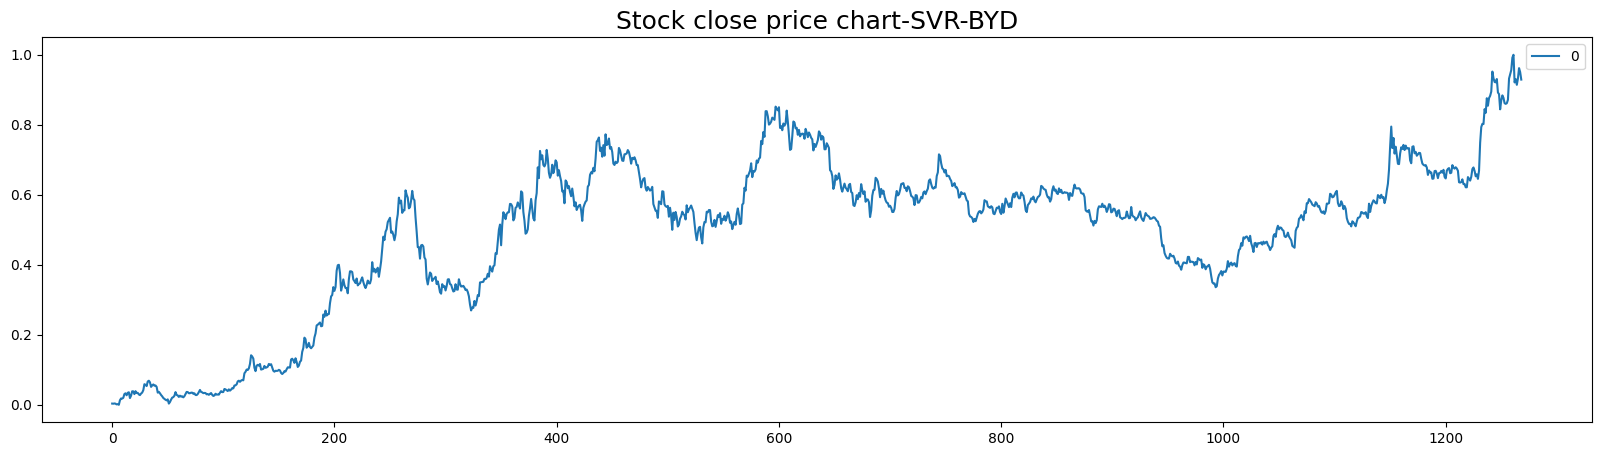

In [39]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart-SVR-BYD",fontsize=18)

Train predicted data:  (1269, 1)
Test predicted data:  (1269, 1)


Text(0.5, 1.0, 'Stock close price chart-SVR-BYD')

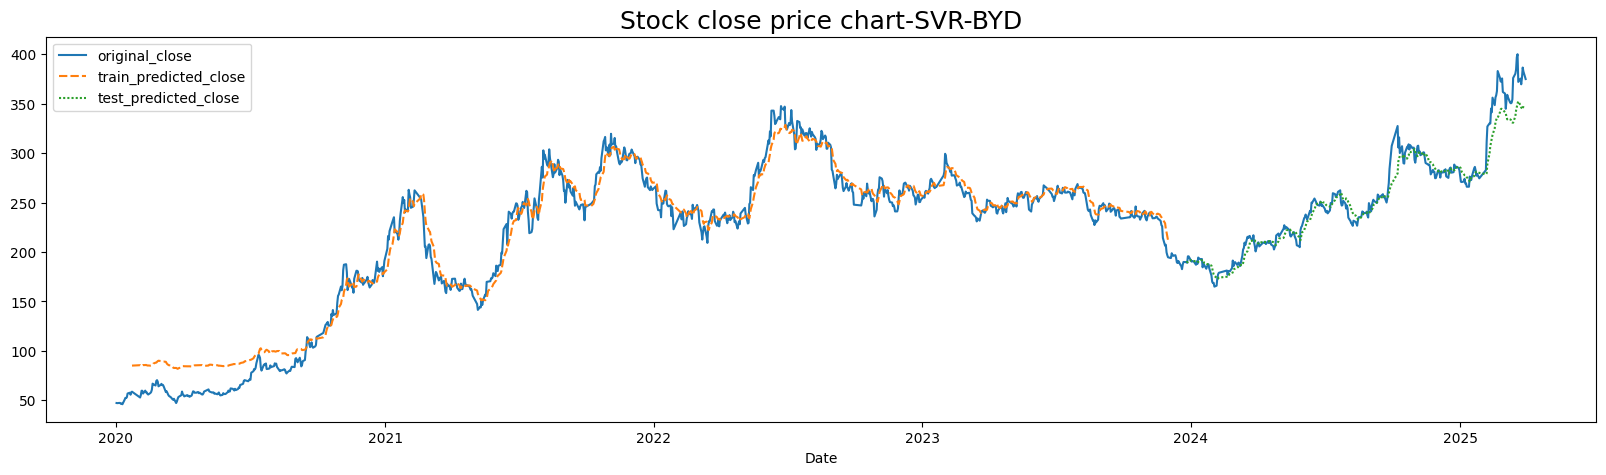

In [40]:
# Shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Stock close price chart-SVR-BYD",fontsize=18)

In [41]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8598231188720296,
 0.8615749766889886,
 0.8714644966234353,
 0.932044870164731,
 0.9442231075697209,
 0.9564296007459523,
 0.9917493147975474,
 1.0,
 0.9209120962956683,
 0.930406035432737,
 0.9141024554265207,
 0.93224266056342,
 0.9618829645955185,
 0.9505806560990082,
 0.9291062699556383]

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8598231188720296,
 0.8615749766889886,
 0.8714644966234353,
 0.932044870164731,
 0.9442231075697209,
 0.9564296007459523,
 0.9917493147975474,
 1.0,
 0.9209120962956683,
 0.930406035432737,
 0.9141024554265207,
 0.93224266056342,
 0.9618829645955185,
 0.9505806560990082,
 0.9291062699556383]

In [43]:
# Creating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.8459979681729253, 0.820548378588632, 0.7966359722096958, 0.7817235425047446, 0.7756504751025535, 0.7742832137082611, 0.7708339510482629, 0.7615827788499037, 0.7505659157389053, 0.7427119631559715]


In [44]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

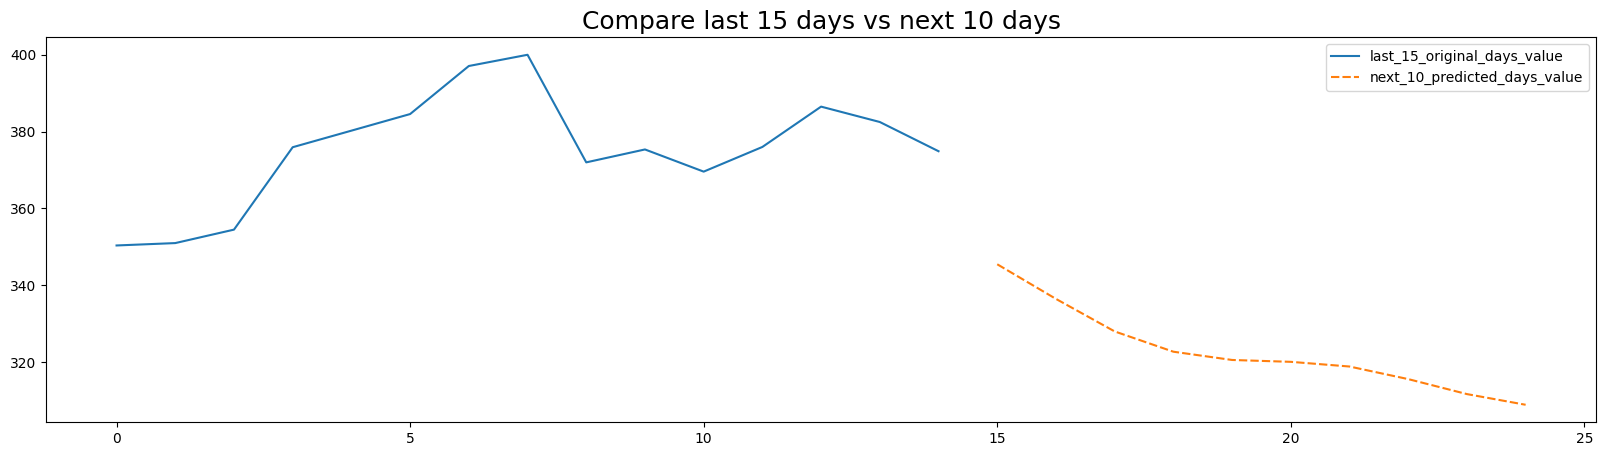

In [45]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})


plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

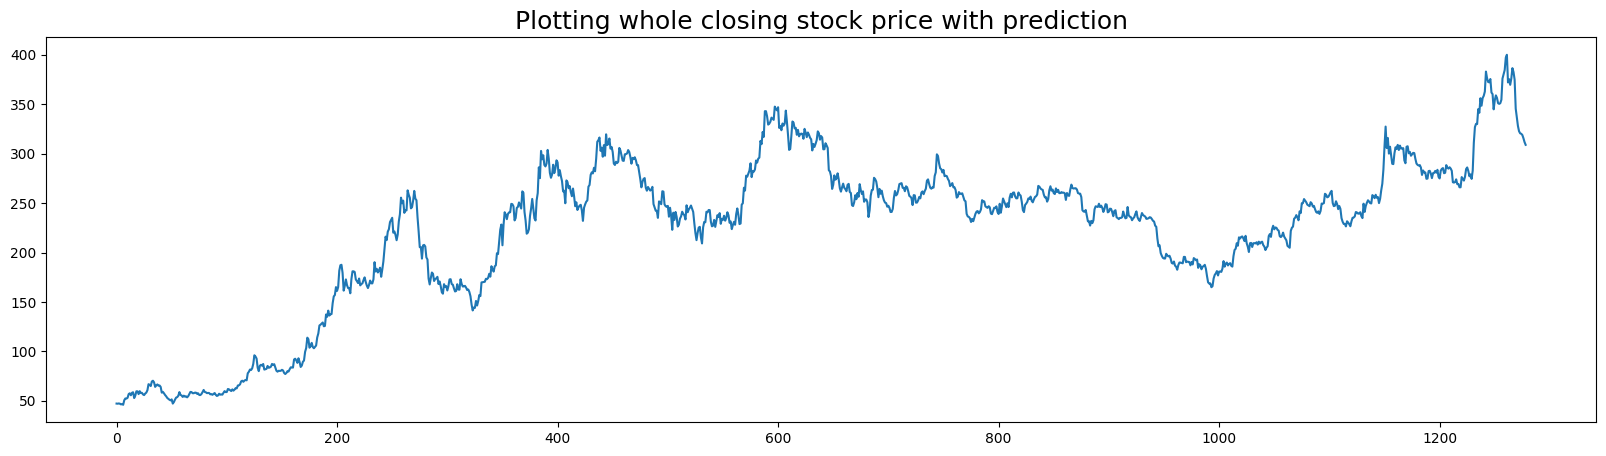

In [46]:
# Creating list of close price
svrdf=closedf.tolist()
# Adding next 10 days prediction
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=svrdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **K Nearest Neighbors (KNN)**





In [47]:
from sklearn import neighbors
K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [48]:
# Lets do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (935, 1)
Test data prediction: (302, 1)


In [49]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [50]:
# Evaluation metrices RMSE and MAE
knn_Train_data_RMSE =  np.sqrt(mean_squared_error(original_ytrain,train_predict))
knn_Train_data_MSE = mean_squared_error(original_ytrain,train_predict)
knn_Train_data_MAE = mean_absolute_error(original_ytrain,train_predict)
knn_Test_data_RMSE = np.sqrt(mean_squared_error(original_ytest,test_predict))
knn_Test_data_MSE = mean_squared_error(original_ytest,test_predict)
knn_Test_data_MAE = mean_absolute_error(original_ytest,test_predict)
knn_Train_data_explained_variance_regression_score= explained_variance_score(original_ytrain, train_predict)
knn_Test_data_explained_variance_regression_score =  explained_variance_score(original_ytest, test_predict)
knn_avg_mse = (knn_Test_data_MSE+ svr_Train_data_MSE) / 2
knn_avg_rmse = (knn_Test_data_RMSE+ svr_Train_data_RMSE) / 2
knn_avg_mae = (knn_Test_data_MAE+ svr_Train_data_MAE) / 2
knn_avg_explained_variance_regression_score = (knn_Test_data_explained_variance_regression_score + knn_Train_data_explained_variance_regression_score) / 2
print("KNN Train data RMSE: ",knn_Train_data_RMSE)
print("KNN Train data MSE: ",knn_Train_data_MSE)
print("KNN Train data MAE: ",knn_Train_data_MAE)
print("KNN Test data RMSE: ",knn_Test_data_RMSE)
print("KNN Test data MSE: ",knn_Test_data_MSE)
print("KNN Test data MAE: ",knn_Test_data_MAE)
print("KNN Train data explained variance regression score: ",knn_Train_data_explained_variance_regression_score)
print("KNN Test data explained variance regression score: ",knn_Test_data_explained_variance_regression_score)
print("KNN Average MSE: ",knn_avg_mse)
print("KNN Average RMSE: ",knn_avg_rmse)
print("KNN Average MAE: ",knn_avg_mae)
print("KNN Average explained variance regression score: ",knn_avg_explained_variance_regression_score)

KNN Train data RMSE:  7.848969946505892
KNN Train data MSE:  61.606329221152706
KNN Train data MAE:  5.594300891265598
KNN Test data RMSE:  17.530221455479264
KNN Test data MSE:  307.3086642781455
KNN Test data MAE:  12.51389183222958
KNN Train data explained variance regression score:  0.9901449553697749
KNN Test data explained variance regression score:  0.8994206669979864
KNN Average MSE:  245.88171317359797
KNN Average RMSE:  15.555816914673551
KNN Average MAE:  11.450011975374123
KNN Average explained variance regression score:  0.9447828111838806


Train predicted data:  (1269, 1)
Test predicted data:  (1269, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price-KNN-BYD')

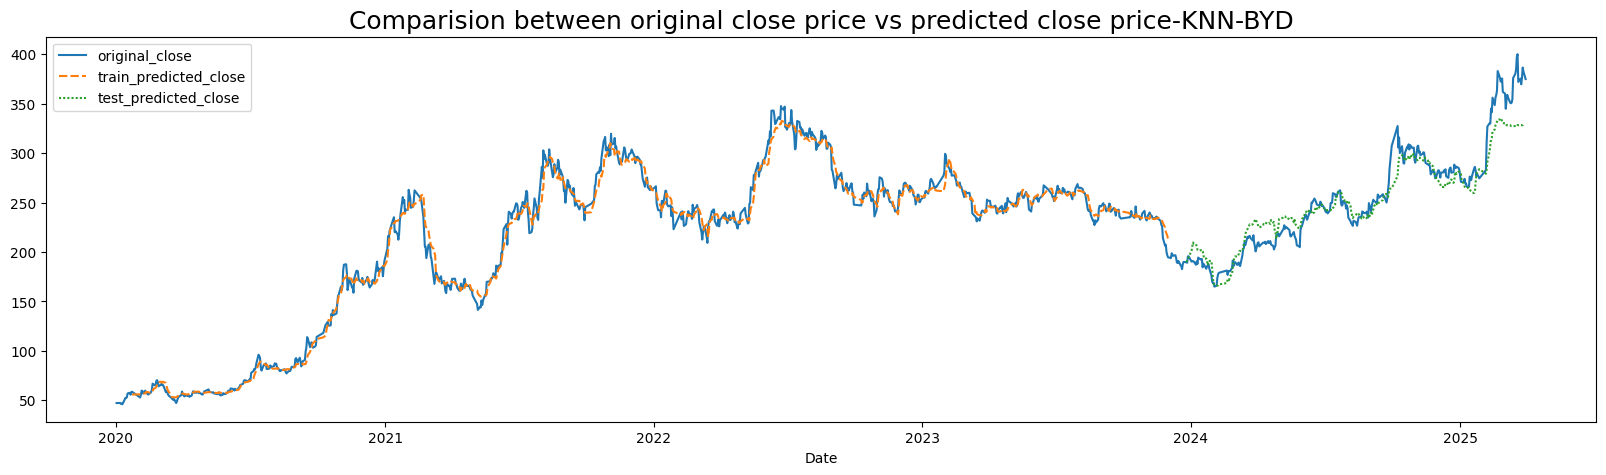

In [51]:
# Shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price-KNN-BYD",fontsize=18)

In [52]:
# 进行多步预测，通过测试集最后15天的数据进行预测后面十天的股票价格走向
# Creating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.8029216467463479, 0.7972723762161755, 0.7948913565595774, 0.7925593135731306, 0.7925593135731306, 0.7885206220037109, 0.7885206220037109, 0.7885356917483727, 0.7872980889680049, 0.7882474828817119]


In [53]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

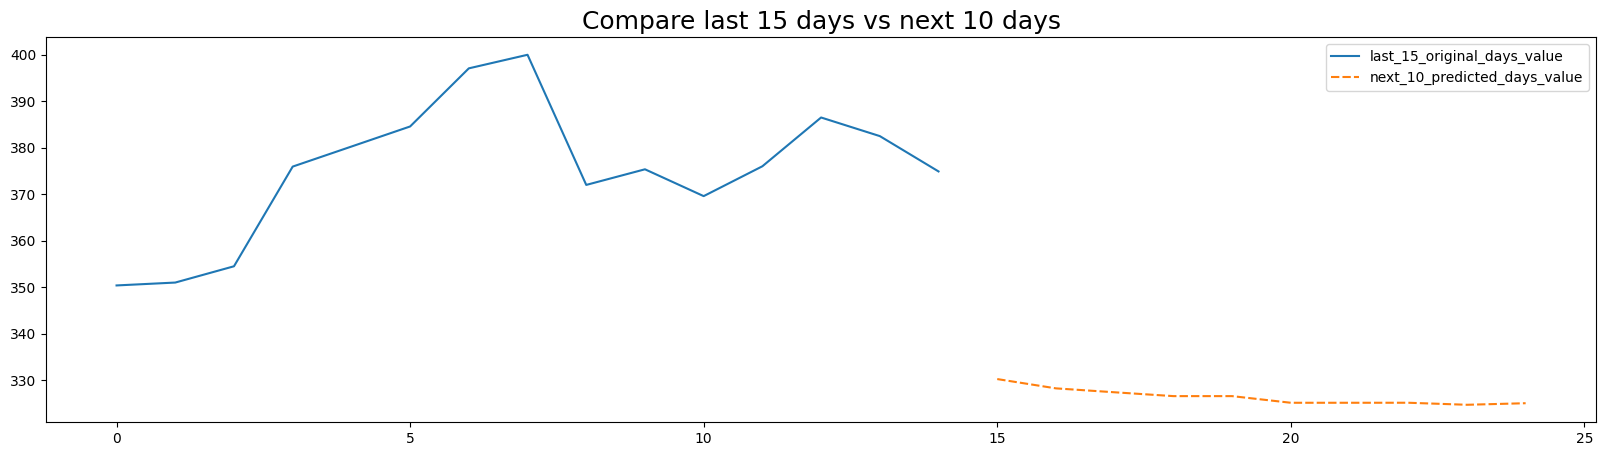

In [54]:
# Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

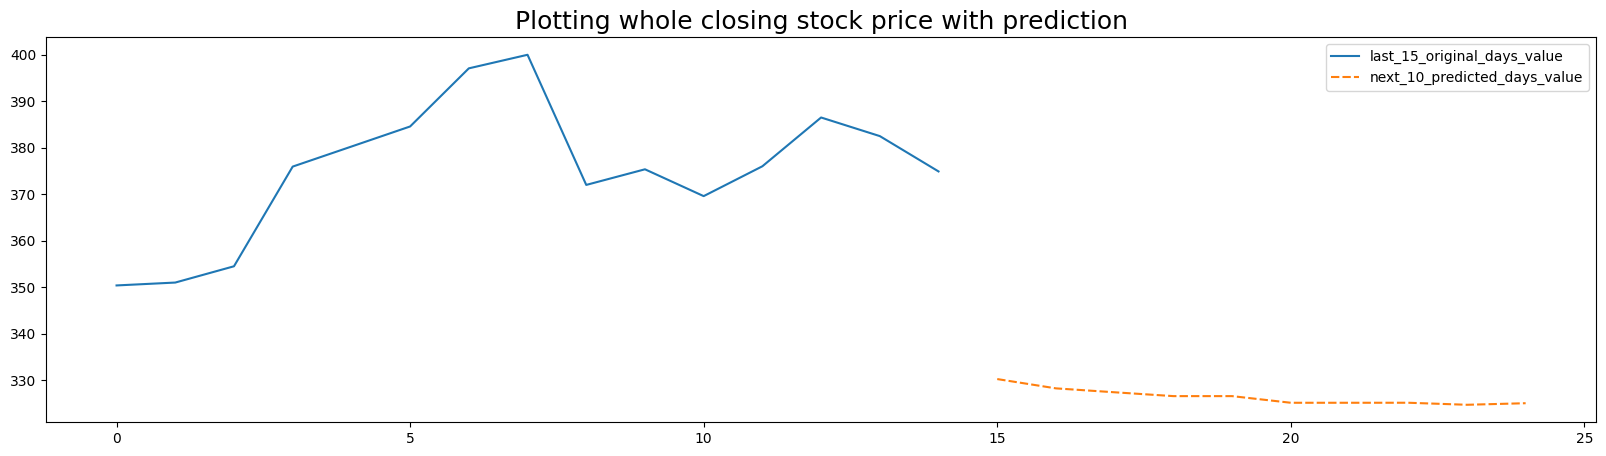

In [55]:
# Creating list of close price
knndf=closedf.tolist()
# Adding next 10 days prediction
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **GRU**
* The GRU (Gated Recurrent Unit) Deep Learning model is a type of artificial neural network that is used for sequence data processing. 
* This model is similar to the LSTM (Long Short-Term Memory) model and is designed to overcome some of the issues associated with LSTM. 
* GRU networks have fewer parameters than LSTM networks, which makes them faster to train and more memory-efficient. 
* The main difference between the two models is that GRU has fewer gates to control the flow of information and therefore, it is less prone to overfitting. 
* The GRU model is widely used in various applications, such as natural language processing, speech recognition, image recognition, and music analysis. 
* It is capable of learning long-term dependencies in the data and can model sequences with arbitrary lengths. In conclusion, the GRU Deep Learning model is a powerful tool for processing sequence data and has proven to be effective in various real-world applications.

In [56]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# GRU requires 3-Dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (935, 15, 1)
X_test:  (302, 15, 1)


In [57]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(256,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(128,return_sequences=True))
model.add(GRU(128,return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 15, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 15, 128)           99072     
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 483521 (1.84 MB)
Trainable params: 483521 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
187/187 [==============================] - 8s 21ms/step - loss: 0.0078 - val_loss: 0.0016
Epoch 2/10
187/187 [==============================] - 3s 16ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/10
187/187 [==============================] - 3s 16ms/step - loss: 8.9002e-04 - val_loss: 7.3534e-04
Epoch 4/10
187/187 [==============================] - 3s 16ms/step - loss: 0.0010 - val_loss: 5.4858e-04
Epoch 5/10
187/187 [==============================] - 3s 16ms/step - loss: 6.5788e-04 - val_loss: 3.8921e-04
Epoch 6/10
187/187 [==============================] - 3s 16ms/step - loss: 5.5598e-04 - val_loss: 3.7865e-04
Epoch 7/10
187/187 [==============================] - 3s 16ms/step - loss: 4.5463e-04 - val_loss: 0.0017
Epoch 8/10
187/187 [==============================] - 3s 17ms/step - loss: 6.7366e-04 - val_loss: 3.4720e-04
Epoch 9/10
187/187 [==============================] - 3s 16ms/step - loss: 5.7464e-04 - val_loss: 3.6861e-04
Epoch 10/10
187/187 [======================

In [60]:
### Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

10/10 [==============================] - 0s 9ms/step


((935, 1), (302, 1))

In [61]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [62]:
# Evaluation metrices RMSE and MAE
GRU_Train_data_RMSE =  np.sqrt(mean_squared_error(original_ytrain,train_predict))
GRU_Train_data_MSE = mean_squared_error(original_ytrain,train_predict)
GRU_Train_data_MAE = mean_absolute_error(original_ytrain,train_predict)
GRU_Test_data_RMSE = np.sqrt(mean_squared_error(original_ytest,test_predict))
GRU_Test_data_MSE = mean_squared_error(original_ytest,test_predict)
GRU_Test_data_MAE = mean_absolute_error(original_ytest,test_predict)
GRU_Train_data_explained_variance_regression_score= explained_variance_score(original_ytrain, train_predict)
GRU_Test_data_explained_variance_regression_score =  explained_variance_score(original_ytest, test_predict)
GRU_avg_mse = (GRU_Test_data_MSE+ GRU_Train_data_MSE) / 2
GRU_avg_rmse = (GRU_Test_data_RMSE+ GRU_Train_data_RMSE) / 2
GRU_avg_mae = (GRU_Test_data_MAE+ GRU_Train_data_MAE) / 2
GRU_avg_explained_variance_regression_score = (GRU_Test_data_explained_variance_regression_score + GRU_Train_data_explained_variance_regression_score) / 2
print("GRU Train data RMSE: ",GRU_Train_data_RMSE)
print("GRU Train data MSE: ",GRU_Train_data_MSE)
print("GRU Train data MAE: ",GRU_Train_data_MAE)
print("GRU Test data RMSE: ",GRU_Test_data_RMSE)
print("GRU Test data MSE: ",GRU_Test_data_MSE)
print("GRU Test data MAE: ",GRU_Test_data_MAE)
print("GRU Train data explained variance regression score: ",GRU_Train_data_explained_variance_regression_score)
print("GRU Test data explained variance regression score: ",GRU_Test_data_explained_variance_regression_score)
print("GRU Average MSE: ",GRU_avg_mse)
print("GRU Average RMSE: ",GRU_avg_rmse)
print("GRU Average MAE: ",GRU_avg_mae)
print("GRU Average explained variance regression score: ",GRU_avg_explained_variance_regression_score)

GRU Train data RMSE:  6.490171959047886
GRU Train data MSE:  42.12233205801147
GRU Train data MAE:  4.684628907881955
GRU Test data RMSE:  6.825422836373324
GRU Test data MSE:  46.58639689528647
GRU Test data MAE:  4.6384443795917845
GRU Train data explained variance regression score:  0.9932150953319491
GRU Test data explained variance regression score:  0.9850466455359599
GRU Average MSE:  44.35436447664897
GRU Average RMSE:  6.657797397710604
GRU Average MAE:  4.66153664373687
GRU Average explained variance regression score:  0.9891308704339545


Train predicted data:  (1269, 1)
Test predicted data:  (1269, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price-GRU-BYD')

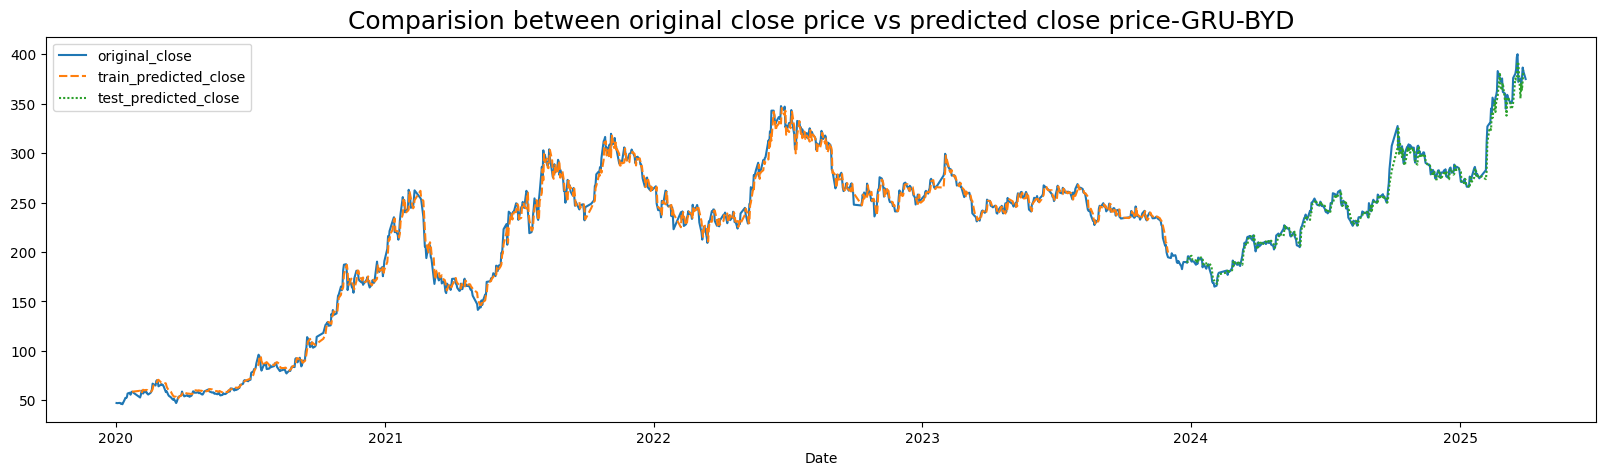

In [63]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price-GRU-BYD",fontsize=18)

In [64]:
# Creating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = model.predict(np.expand_dims(x_input, 2))
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ", lst_output)

1/1 [==============================] - 0s 17ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.9028070569038391], [0.8797379732131958], [0.8617651462554932], [0.847822368144989], [0.8361203074455261], [0.8253354430198669], [0.8148670196533203], [0.8046274185180664], [0.7947415709495544], [0.785338282585144]]


In [65]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

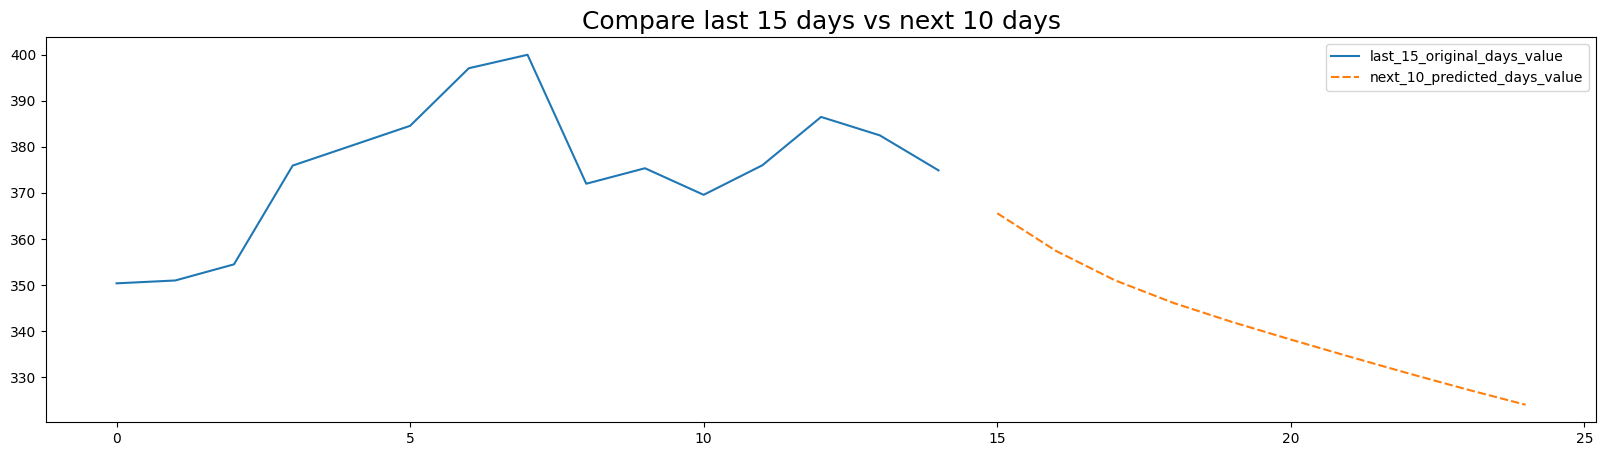

In [66]:
# Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

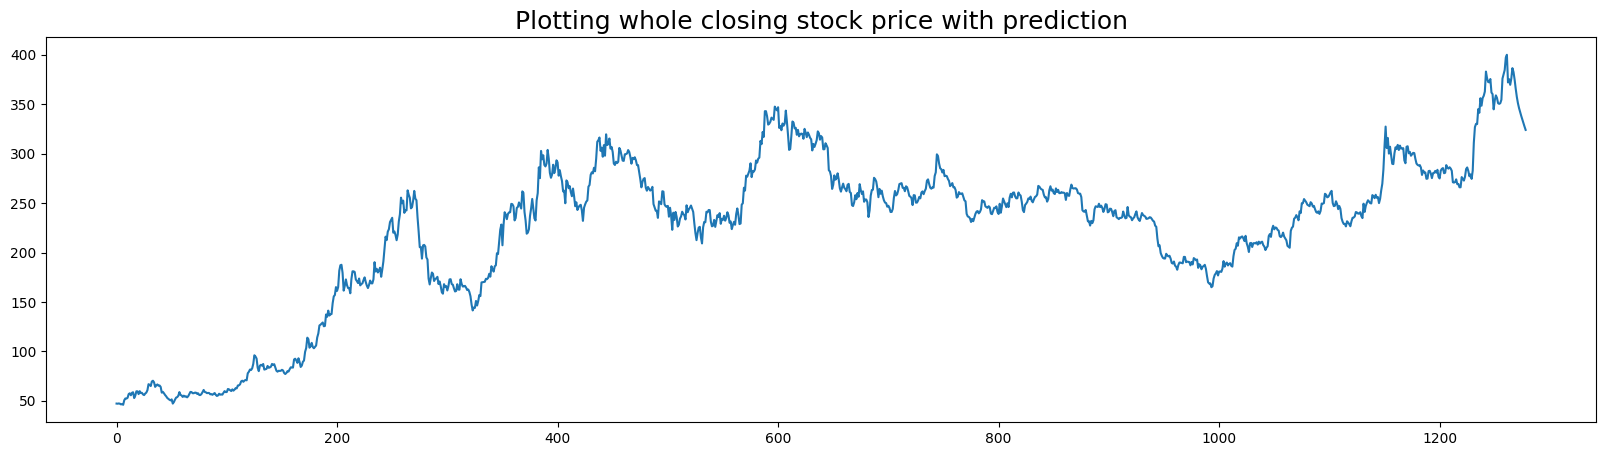

In [67]:
# Creating list of close price
grudf=closedf.tolist()
# Adding next 10 days prediction
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=grudf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

In [68]:
model.save('gru_model.h5')
gru_model = tf.keras.models.load_model('gru_model.h5')

e:\anaconda\envs\rnntry\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 15, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 15, 128)           99072     
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 483521 (1.84 MB)
Trainable params: 483521 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Linear Regression**

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
import numpy as np

In [71]:
# 创建时间特征（转换为从起始日开始的序列号）
df['days'] = np.arange(len(df))


# 准备特征矩阵和目标向量
X = df[['days']].values  # 输入特征（天数）
y = df['Close'].values   # 目标变量（收盘价）

# 按时间顺序划分训练集和测试集（75%训练，25%测试）
split = int(0.75 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Linear Regression Train data RMSE:  53.29826201050946
Linear Regression Train data MSE:  2840.704733340916
Linear Regression Train data MAE:  44.679528196869924
Linear Regression Test data RMSE:  104.82676613457637
Linear Regression Test data MSE:  10988.650898233167
Linear Regression Test data MAE:  98.1852127518477
Linear Regression Train data explained variance regression score:  0.5632971545087876
Linear Regression Test data explained variance regression score:  0.54252491912651
Linear Regression Average MSE:  6914.677815787041
Linear Regression Average RMSE:  79.06251407254291
Linear Regression Average MAE:  71.4323704743588
Linear Regression Average explained variance regression score:  0.5529110368176489


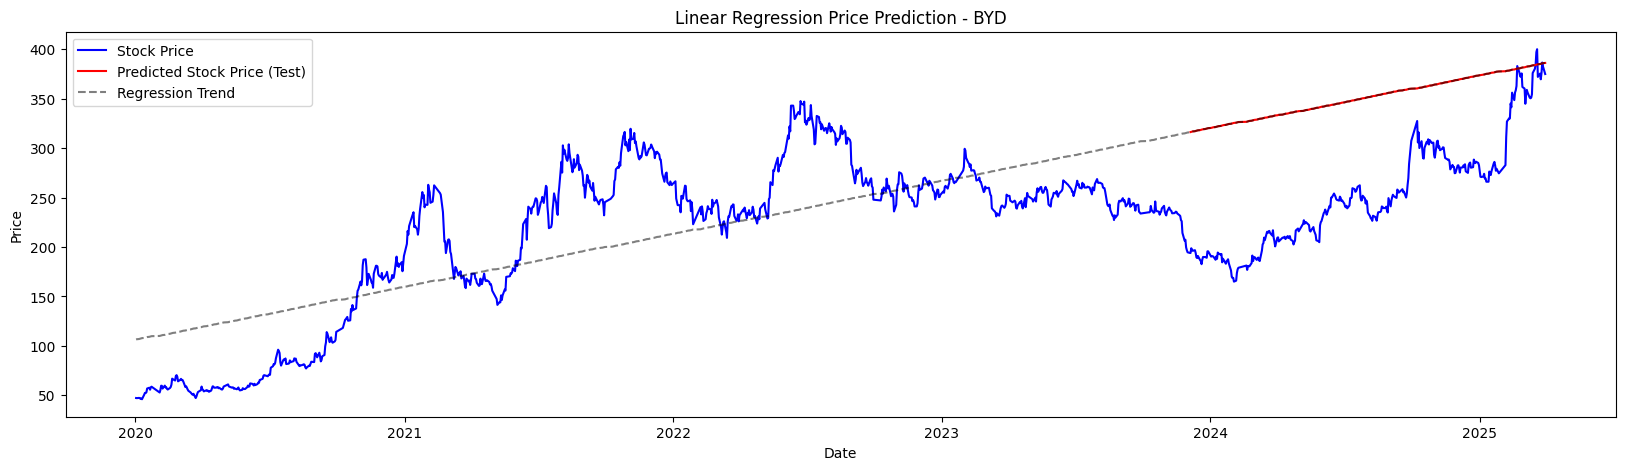

In [72]:
# Evaluation metrices RMSE and MAE
lg_TRAIN_data_RMSE =  np.sqrt(mean_squared_error(y_train, y_pred_train))
lg_TRAIN_data_MSE = mean_squared_error(y_train, y_pred_train)
lg_TRAIN_data_MAE = mean_absolute_error(y_train, y_pred_train)
lg_TEST_data_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
lg_TEST_data_MSE = mean_squared_error(y_test, y_pred_test)
lg_TEST_data_MAE = mean_absolute_error(y_test, y_pred_test)
lg_Train_data_explained_variance_regression_score= explained_variance_score(y_train, y_pred_train)
lg_Test_data_explained_variance_regression_score =  explained_variance_score(y_test, y_pred_test)
lg_avg_mse = (lg_TEST_data_MSE+ lg_TRAIN_data_MSE) / 2
lg_avg_rmse = (lg_TEST_data_RMSE+ lg_TRAIN_data_RMSE) / 2
lg_avg_mae = (lg_TEST_data_MAE+ lg_TRAIN_data_MAE) / 2
lg_avg_explained_variance_regression_score = (lg_Test_data_explained_variance_regression_score + lg_Train_data_explained_variance_regression_score) / 2
print("Linear Regression Train data RMSE: ",lg_TRAIN_data_RMSE)
print("Linear Regression Train data MSE: ",lg_TRAIN_data_MSE)
print("Linear Regression Train data MAE: ",lg_TRAIN_data_MAE)
print("Linear Regression Test data RMSE: ",lg_TEST_data_RMSE)
print("Linear Regression Test data MSE: ",lg_TEST_data_MSE)
print("Linear Regression Test data MAE: ",lg_TEST_data_MAE)
print("Linear Regression Train data explained variance regression score: ",lg_Train_data_explained_variance_regression_score)
print("Linear Regression Test data explained variance regression score: ",lg_Test_data_explained_variance_regression_score)
print("Linear Regression Average MSE: ",lg_avg_mse)
print("Linear Regression Average RMSE: ",lg_avg_rmse)
print("Linear Regression Average MAE: ",lg_avg_mae)
print("Linear Regression Average explained variance regression score: ",lg_avg_explained_variance_regression_score)

# 可视化预测结果
plt.figure(figsize=(20,5))
# 绘制实际价格
plt.plot(df.index, y, label = 'Stock Price', color='blue')

# 绘制测试集预测
plt.plot(df.index[split:], y_pred_test,
         label = 'Predicted Stock Price (Test)', color = 'red')

# 绘制趋势线
full_pred = model.predict(X)
plt.plot(df.index, full_pred,
         label = 'Regression Trend', color = 'black', linestyle = '--', alpha = 0.5)
plt.title('Linear Regression Price Prediction - BYD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

### **Long short-term memory (LSTM)**

In [73]:
import tensorflow as tf
from numpy import array
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional


In [74]:
# 设置相关参数
n_timestamp = 40 # 时间戳
n_epochs = 20 # 训练轮数
# ====================================
# 选择模型：
# 1: 单层 LSTM
# 2: 多层 LSTM
# 3: 双向 LSTM
# ====================================
model_type = 1

# 前75%数据作为训练集, 后25%数据作为测试集
# 按时间顺序划分训练集和测试集
n_total = len(df) # 总数据量
n_train = int(n_total * 0.75) # 前70%作为训练集
train_set = df.iloc[:n_train][['Close']].values # 提取close列，保留二维结构
test_set = df.iloc[n_train:][['Close']].values
scaler = MinMaxScaler(feature_range = (0, 1))
closedf = scaler.fit_transform(train_set)
test_set_scaled  = scaler.transform(test_set)

# 取前n_timestamp天的数据为X; n_timestamp+1天数据为Y
def data_split(sequence, n_timestamp):
    X = []
    Y = []
    for i in range(len(sequence)):
        end_ix = i + n_timestamp

        if end_ix > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        Y.append(seq_y)
    return array(X), array(Y)

X_train, y_train = data_split(closedf, n_timestamp)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test, y_test = data_split(test_set_scaled, n_timestamp)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 建构LSTM模型
if model_type == 1:
    # 单层LSTM
    model = Sequential()
    model.add(LSTM(units = 50, activation = 'relu',
                   input_shape = (X_train.shape[1], 1)))
    model.add(Dense(units = 1))
if model_type == 2:
    # 多层LSTM
    model = Sequential()
    model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                   input_shape = (X_train.shape[1], 1)))
    model.add(LSTM(units = 50, activation = 'relu'))
    model.add(Dense(1))
if model_type == 3:
    # 双向LSTM
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'),
                            input_shape = (X_train.shape[1], 1)))
    model.add(Dense(1))

print(model.summary()) # 输出模型结构

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = 'mean_squared_error') # 损失函数用均方误差

history = model.fit(X_train, y_train,
                    batch_size = 64,
                    epochs = n_epochs,
                    validation_data = (X_test, y_test),
                    validation_freq = 1) # 测试的epoch间隔数

print(model.summary()) # 输出模型结构

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
15/15 [==============================] - 1s 24ms/step - loss: 0.2570 - val_loss: 0.2227
Epoch 2/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0699 - val_loss: 0.0619
Epoch 3/20
15/15 [==============================] - 0s 15ms/step - loss: 0.0103 - val_loss: 0.0049
Epoch 4/20
15/15 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 5/20
15

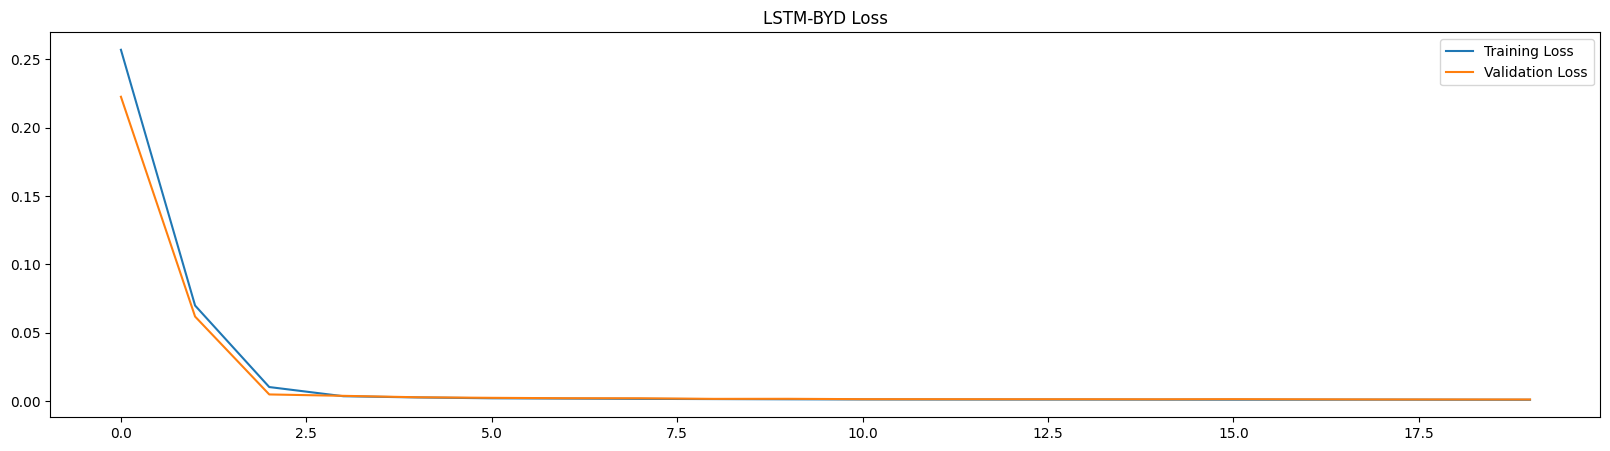

9/9 [==============================] - 0s 4ms/step


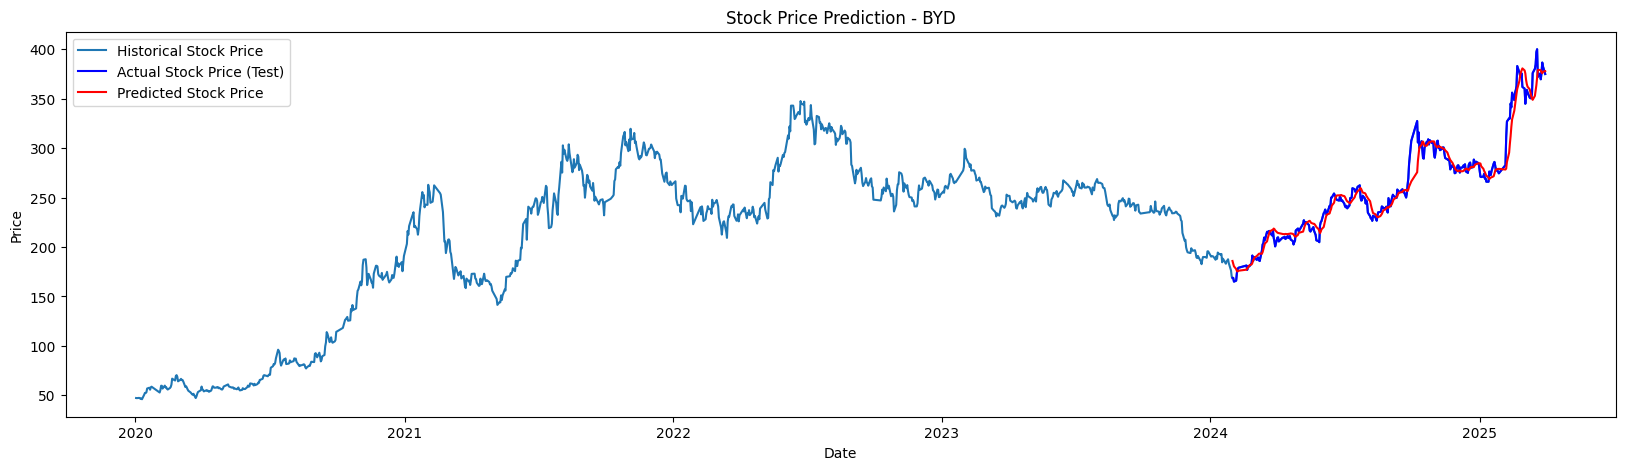

LSTM Average MSE:  109.68785000695287
LSTM Average RMSE:  10.473196742492373
LSTM Average MAE:  7.3018878305558665
LSTM Average explained variance regression score:  0.9609757843581379


In [75]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('LSTM-BYD Loss')
plt.legend()
plt.show() # loss下降, val_loss下降

predicted_stock_price = model.predict(X_test) # 测试集输入模型进行预测
predicted_stock_price = scaler.inverse_transform(predicted_stock_price) # 对预测数据还原——从(0,1)反归一化到原始范围
real_stock_price = scaler.inverse_transform(y_test) # 对实际数据还原——从(0,1)反归一化到原始范围

# 生成测试集对应日期
test_start = n_train + n_timestamp
test_end = test_start + len(y_test)
test_dates = df['Date'].iloc[test_start:test_end]

# 可视化整合
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['Close'], label = 'Historical Stock Price')
plt.plot(test_dates, real_stock_price.ravel(), label = 'Actual Stock Price (Test)', color = 'blue')
plt.plot(test_dates, predicted_stock_price.ravel(), label = 'Predicted Stock Price', color = 'red')
plt.title('Stock Price Prediction - BYD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


LSTM_avg_mse = metrics.mean_squared_error(real_stock_price, predicted_stock_price)
LSTM_avg_rmse = metrics.mean_squared_error(real_stock_price, predicted_stock_price) ** 0.5
LSTM_avg_mae = metrics.mean_absolute_error(real_stock_price, predicted_stock_price)
LSTM_avg_explained_variance_regression_score = metrics.explained_variance_score(real_stock_price, predicted_stock_price)
print("LSTM Average MSE: ",LSTM_avg_mse)
print("LSTM Average RMSE: ",LSTM_avg_rmse)
print("LSTM Average MAE: ",LSTM_avg_mae)
print("LSTM Average explained variance regression score: ",LSTM_avg_explained_variance_regression_score)

### **COLUMN**

In [76]:
table_data = {
    "": ["MSE", "RMSE", "MAE", "Explained Variance"],
    "Linear Regression": [lg_avg_mse, lg_avg_rmse, lg_avg_mae, lg_avg_explained_variance_regression_score],
    "SVR": [svr_avg_mse, svr_avg_rmse, svr_avg_mae, svr_avg_explained_variance_regression_score],
    "KNN": [knn_avg_mse, knn_avg_rmse, knn_avg_mae, knn_avg_explained_variance_regression_score],
    "GRU": [GRU_avg_mse, GRU_avg_rmse, GRU_avg_mae, GRU_avg_explained_variance_regression_score],
    "LSTM": [LSTM_avg_mse, LSTM_avg_rmse, LSTM_avg_mae, LSTM_avg_explained_variance_regression_score],
}
# Create a pandas DataFrame
table_df = pd.DataFrame(table_data)

# Set the first column as the index
table_df.set_index("", inplace=True)

# Display the table
print(table_df)

                    Linear Regression         SVR         KNN        GRU  \
                                                                           
MSE                       6914.677816  176.568257  245.881713  44.354364   
RMSE                        79.062514   13.284583   15.555817   6.657797   
MAE                         71.432370    9.415243   11.450012   4.661537   
Explained Variance           0.552911    0.960493    0.944783   0.989131   

                          LSTM  
                                
MSE                 109.687850  
RMSE                 10.473197  
MAE                   7.301888  
Explained Variance    0.960976  
